In [73]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import export_graphviz
from statistics import mean
from subprocess import call
from IPython.display import Image
from ann_visualizer.visualize import ann_viz;
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import time

import os
os.environ["PATH"] += os.pathsep + 'E:/Graphviz/bin/'

pd.options.mode.chained_assignment = None

col_names = ['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info','src_port','dst_port']
data_frame = pd.read_csv("Samples/smallTraffic-_backup.csv",encoding = "ISO-8859-1", header=0, names=col_names)

data_frame.head(20)

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
1,0.000000,192.168.3.131,72.14.213.138,HTTP,997,GET /complete/search?client=chrome&hl=en-US&q=...,57011.0,80.0
2,0.029841,72.14.213.138,192.168.3.131,HTTP,440,HTTP/1.1 200 OK (text/javascript),80.0,57011.0
3,0.223883,192.168.3.131,72.14.213.102,TCP,66,55950 > 80 [SYN] Seq=0 Win=8192 Len=0 MSS=14...,55950.0,80.0
4,0.229423,192.168.3.131,72.14.213.138,TCP,54,57011 > 80 [ACK] Seq=944 Ack=387 Win=16192 L...,57011.0,80.0
5,0.242649,72.14.213.102,192.168.3.131,TCP,66,"80 > 55950 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",80.0,55950.0
6,0.242696,192.168.3.131,72.14.213.102,TCP,54,55950 > 80 [ACK] Seq=1 Ack=1 Win=65780 Len=0,55950.0,80.0
7,0.243050,192.168.3.131,72.14.213.102,HTTP,998,GET /complete/search?client=chrome&hl=en-US&q=...,55950.0,80.0
8,0.262981,192.168.3.131,72.14.213.102,TCP,54,"55950 > 80 [FIN, ACK] Seq=945 Ack=1 Win=6578...",55950.0,80.0
9,0.264074,72.14.213.102,192.168.3.131,TCP,60,80 > 55950 [ACK] Seq=1 Ack=945 Win=7616 Len=0,80.0,55950.0
10,0.276671,72.14.213.102,192.168.3.131,HTTP,541,HTTP/1.1 200 OK (text/javascript),80.0,55950.0


In [74]:
icmp = ['ICMP']
temp_df = data_frame['Protocol'].copy(deep=True)
data_frame.src_port[temp_df.isin(icmp)] = -1 #0
data_frame.dst_port[temp_df.isin(icmp)] = -1 #0

data_frame.loc[(data_frame['src_port'] == -1) & (data_frame['dst_port'] == -1)].head(10)

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
5960,116.676994,10.0.2.2,10.0.2.15,ICMP,202,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
5961,116.677060,10.0.2.2,10.0.2.15,ICMP,203,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6035,117.265243,10.0.2.2,10.0.2.15,ICMP,202,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6036,117.265322,10.0.2.2,10.0.2.15,ICMP,203,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6133,117.812397,10.0.2.2,10.0.2.15,ICMP,202,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6134,117.812489,10.0.2.2,10.0.2.15,ICMP,203,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6142,118.248598,10.0.2.2,10.0.2.15,ICMP,202,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6143,118.248695,10.0.2.2,10.0.2.15,ICMP,203,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6164,118.702913,10.0.2.2,10.0.2.15,ICMP,202,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0
6165,118.702988,10.0.2.2,10.0.2.15,ICMP,203,Time-to-live exceeded (Time to live exceeded i...,-1.0,-1.0


In [75]:
data_frame.loc[(data_frame['src_port'] != -1) & (data_frame['dst_port'] != -1) & (data_frame['Protocol'] == "ICMP")]

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port


In [76]:
label_enc = preprocessing.LabelEncoder()

src_encoded=label_enc.fit_transform(data_frame['Source'])
dst_encoded=label_enc.fit_transform(data_frame['Destination'])

src_port_encoded=label_enc.fit_transform(data_frame['src_port'])
dst_port_encoded=label_enc.fit_transform(data_frame['dst_port'])

len_encoded = label_enc.fit_transform(data_frame['Length'])

protocol_encoded=label_enc.fit_transform(data_frame['Protocol'])

features=list(zip(src_encoded,dst_encoded,src_port_encoded,dst_port_encoded,len_encoded))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, protocol_encoded, test_size=0.3)

X_train = np.asarray(X_train, dtype=np.int32)
X_test = np.asarray(X_test, dtype=np.int32)
y_train = np.asarray(y_train, dtype=np.int32)
y_test = np.asarray(y_test, dtype=np.int32)

In [78]:
outputCount = data_frame['Protocol'].nunique()

In [86]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(outputCount, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=12)

Epoch 1/12
312/312 [==============================] - 0s 534us/step - loss: 5.9289 - accuracy: 0.7432
Epoch 2/12
312/312 [==============================] - 0s 556us/step - loss: 0.8527 - accuracy: 0.8428
Epoch 3/12
312/312 [==============================] - 0s 550us/step - loss: 0.6423 - accuracy: 0.8602
Epoch 4/12
312/312 [==============================] - 0s 537us/step - loss: 0.5936 - accuracy: 0.8702
Epoch 5/12
312/312 [==============================] - 0s 531us/step - loss: 0.6543 - accuracy: 0.8706
Epoch 6/12
312/312 [==============================] - 0s 553us/step - loss: 0.6551 - accuracy: 0.8697
Epoch 7/12
312/312 [==============================] - 0s 534us/step - loss: 0.4227 - accuracy: 0.8875
Epoch 8/12
312/312 [==============================] - 0s 563us/step - loss: 0.4153 - accuracy: 0.8941
Epoch 9/12
312/312 [==============================] - 0s 534us/step - loss: 0.3790 - accuracy: 0.8936
Epoch 10/12
312/312 [==============================] - 0s 543us/step - loss: 0.336

In [80]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print("Loss: {}".format(val_loss))
print("Accuracy: {}".format(val_acc))

134/134 [==============================] - 0s 444us/step - loss: 0.2751 - accuracy: 0.8981
Loss: 0.27512040734291077
Accuracy: 0.8981070518493652


In [81]:
model.save('network_traffic_classificator.model')

INFO:tensorflow:Assets written to: network_traffic_classificator.model\assets


In [82]:
new_model = tf.keras.models.load_model('network_traffic_classificator.model')

In [83]:
val_loss, val_acc = new_model.evaluate(X_test,y_test)
print("Loss: {}".format(val_loss))
print("Accuracy: {}".format(val_acc))

134/134 [==============================] - 0s 383us/step - loss: 0.2751 - accuracy: 0.8981
Loss: 0.27512040734291077
Accuracy: 0.8981070518493652


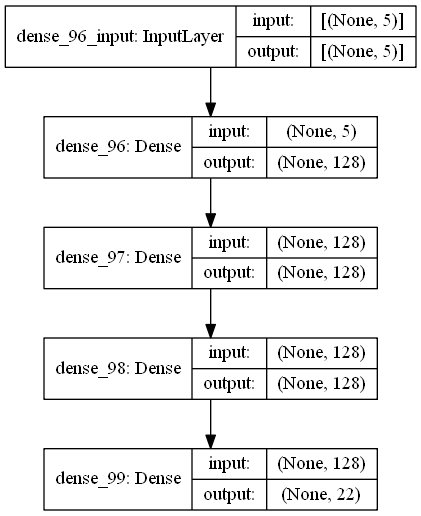

In [84]:
from keras.utils.vis_utils import plot_model


plot_model(model, to_file='Files/model_plot.png', show_shapes=True, show_layer_names=True)

In [87]:
ann_viz(model, view=True, filename='Files/networkTrafficClassificatorNeuralNetworkVisualize',title="Network Traffic Classificator Neural Network Visualize")

In [88]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 128)               768       
_________________________________________________________________
dense_101 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_102 (Dense)            (None, 22)                2838      
Total params: 20,118
Trainable params: 20,118
Non-trainable params: 0
_________________________________________________________________
